In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Orbit TAS Historic Attainment - Sheet1.csv')
df = df.rename(columns={"UAA Attainment ":"UAA Attainment"})
df['Points Attainment']=df['Points Attainment'].replace('%','',regex=True).astype('float')/100
df['UAA Attainment'] = df['UAA Attainment'].replace('%','',regex=True).astype('float')/100

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
quarter                  36 non-null object
podname                  36 non-null object
Cluster                  36 non-null object
Headcount                36 non-null float64
PointsWon                36 non-null int64
PointsTarget             36 non-null int64
UniqueAccountsAdopted    36 non-null int64
AccountsTarget           36 non-null int64
Points Attainment        36 non-null float64
UAA Attainment           36 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.9+ KB


In [9]:
df = df[df['Cluster']=="Cluster 1"]
def bootstrap_replicate_1d(data,func):
    return(func(np.random.choice(data,len(data))))

def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return(bs_replicates)

bs_replicates = draw_bs_reps(df['Points Attainment'],np.mean,100000)


In [10]:
print(np.percentile(bs_replicates,[2.5,97.5]))

[ 1.04005443  1.18676375]


Standard error of the mean: 0.0373964849396
Margin of error: 0.0615117438881
Recalculated confidence interval: [1.0476708109754993, 1.1706942987517732]


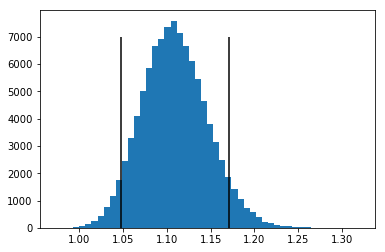

In [11]:
from scipy import stats
import matplotlib.pyplot as plt

sem = np.std(df['Points Attainment'])/np.sqrt(len(df['Points Attainment']))
print("Standard error of the mean:",sem)
z_critical = stats.norm.ppf(q = 0.95)
margin_of_error = z_critical*sem
print("Margin of error:",margin_of_error)
confidence_interval = [np.mean(bs_replicates) - margin_of_error, np.mean(bs_replicates) + margin_of_error]
print("Recalculated confidence interval:",confidence_interval)
plt.vlines(x=np.mean(bs_replicates) - margin_of_error,ymin = 0,ymax=7000)
plt.vlines(x=np.mean(bs_replicates) + margin_of_error,ymin = 0,ymax=7000)
plt.hist(bs_replicates,bins =50)
plt.show()


Standard error of the mean: 0.024926702787
Margin of error: 0.0410007774872
Recalculated confidence interval: [1.1015465878309847, 1.1835481428053782]


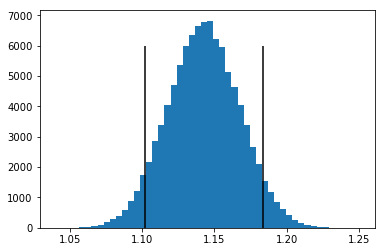

In [13]:
uaa_bs_replicates = draw_bs_reps(df['UAA Attainment'][df['Cluster']=='Cluster 1'],np.mean,100000)


sem = np.std(df['UAA Attainment'])/np.sqrt(len(df['UAA Attainment']))
print("Standard error of the mean:",sem)
z_critical = stats.norm.ppf(q = 0.95)
margin_of_error = z_critical*sem
print("Margin of error:",margin_of_error)
confidence_interval = [np.mean(uaa_bs_replicates) - margin_of_error, np.mean(uaa_bs_replicates) + margin_of_error]
print("Recalculated confidence interval:",confidence_interval)
plt.vlines(x=np.mean(uaa_bs_replicates) - margin_of_error,ymin = 0,ymax=6000)
plt.vlines(x=np.mean(uaa_bs_replicates) + margin_of_error,ymin = 0,ymax=6000)
plt.hist(uaa_bs_replicates,bins =50)
plt.show()
